In [2]:
import numpy as np
import pandas as pd


In [8]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')


Join the two datasets on 'id' column

In [10]:
df1.columns= ['id','title','cast','crew']
df2= df2.merge(df1,on='id')

print first 5 records of dataset df2

In [12]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Demographic Filtering-
We will need 
1. a metric to score or rate movie
2.Calculate the score for every movie
3.Sort the scores and recommend the best rated movie to the users.

using IMDB's weighted rating (wr) which is given as :-
wr= (v*R/(v+m)) + (m*C/(v+m))

where,

v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report
We already have v(vote_count) and R (vote_average) and C can be calculated as


In [13]:
C= df2['vote_average'].mean()
C

6.092171559442016

Now determine appropriate value of m.For a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [14]:
m=df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Filter out qualified movies

In [15]:
q_movies= df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 23)

Therefore, 481 movies qualify 

 Now,to calculate our metric for each qualified movie. we need to define a function, weighted_rating() and define a new feature score. the value of score is calculated by applying this function to our DataFrame of QUALIFIED movies

In [16]:
def weighted_rating(x, m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    #Calculationm based on IMDB's formula-
    return (v/(v+m) * R) + (m/(m+v) * C)  

In [17]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score']=q_movies.apply(weighted_rating,axis=1)

Sort the DataFrame based on the score feature

In [18]:
q_movies=q_movies.sort_values('score',ascending=False)

Print the top 15 scored movies
This is the first very basic recommender .

In [20]:
q_movies[['original_title','vote_count','vote_average','score']].head(15)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


 Sort the dataset by the popularity column

In [21]:
popularity= df2.sort_values('popularity',ascending=False)

EDA - using matplotlib.pylot library plot a horizontal bar graph of popular movies

Text(0.5, 1.0, 'Popular Movies')

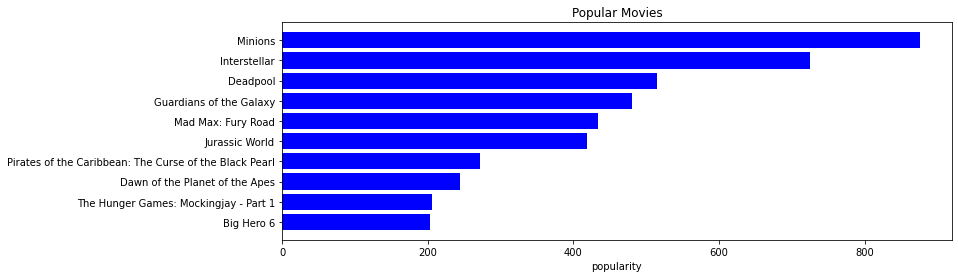

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,4))
plt.barh(popularity['original_title'].head(10),popularity['popularity'].head(10)
,align='center',color='blue')
plt.gca().invert_yaxis()
plt.xlabel("popularity")
plt.title("Popular Movies")

Demographic Filtering provides a general recommendation of movies to all users .But to make personalized recommendation according to the inerests and tastes of a particular user, Content Basesd Filtering is used.


We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. 
For e.g. two similar horror movies can be paired and their similarity score can be calculated using description (which is available in 'overview' column of our dataset)

Print overview of 1st 5 movies 

In [24]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.This will give  a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [28]:
#import TfIdfVectorizer from scikit-learn 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidif=TfidfVectorizer(stop_words='english') 
#replace any NaN values with empty string
df2['overview']=df2['overview'].fillna("")
#construct tf-idf matrix 
tfidif_matrix= tfidif.fit_transform(df2['overview'])
tfidif_matrix.shape

(4803, 20978)

Thus,  more than 20,000 different words were used to describe 4803 movies.To comput  the similarity score , cosine similarity is used .
similarity = cos(theta)=A.B/||A||*||B||

In [29]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidif_matrix,tfidif_matrix)

Now define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.For this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [31]:
#Construct a reverse map of indices and movie titles
indices= pd.Series(df2.index,index=df2['original_title']).drop_duplicates()

Our recommendation system will do the following -
1.Get the index of the movie given its title.
2.Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
3.Sort the list of tuples based on the similarity scores; that is, the second element.
4.Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
5.Return the titles corresponding to the indices of the top elements.

In [37]:
# Function that takes in movie title as input and outputs most similar movies
def get_recom(original_title,cosine_similarity=cosine_similarity):
    indx= indices[original_title]
    #get pairwise similarity score 
    sim_score= list(enumerate(cosine_similarity[indx]))
    #sort the movies based on similarity scores 
    sim_score= sorted(sim_score,key=lambda x:x[1],reverse=True)
      # Get the scores of the 10 most similar movies
    sim_score=sim_score[1:11]
    #get the movie indices
    movie_indices= [i[0]for i in sim_score]
    #return top 10 most similar movies 
    return df2['original_title'].iloc[movie_indices]

In [40]:
get_recom('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341                Obitaemyy Ostrov
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: original_title, dtype: object

The recommendation system has found movies with similar plot descriptions and thus, recommends them!